In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

DBSCAN DB Index: 0.5058
DBSCAN Silhouette Score: 0.3022


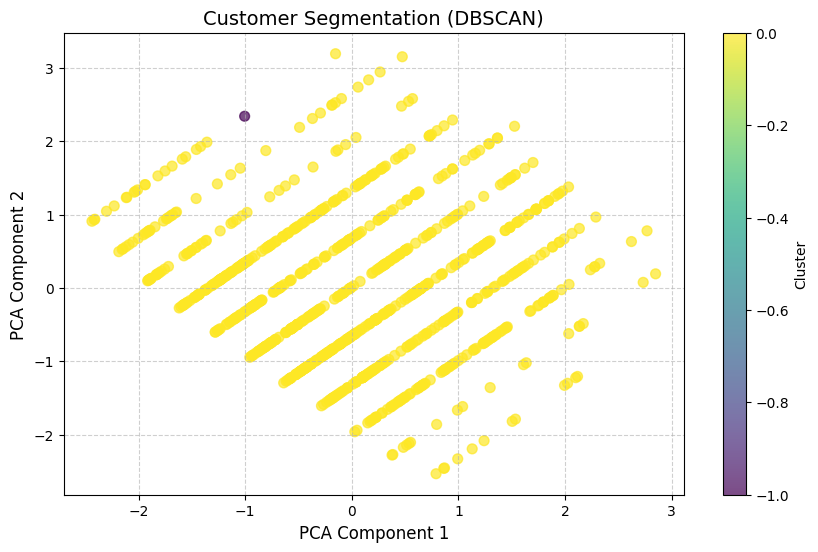

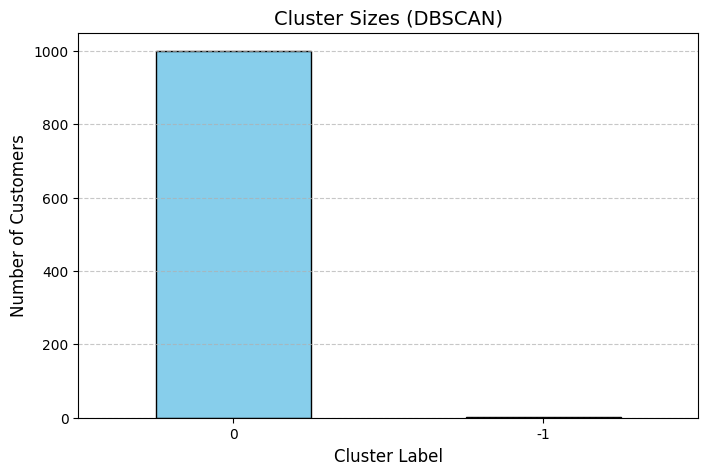

In [25]:
# Step 1: Load datasets
customers = pd.read_csv(r'C:\Users\aasri\Zeotap_Assignment\dataset\Customers.csv')
transactions = pd.read_csv(r'C:\Users\aasri\Zeotap_Assignment\dataset\Transactions.csv')

# Step 2: Merge datasets and create features
merged_data = pd.merge(customers, transactions, on='CustomerID')
transaction_count = transactions.groupby('CustomerID')['TransactionID'].count().reset_index()
transaction_count.rename(columns={'TransactionID': 'TransactionCount'}, inplace=True)
merged_data = pd.merge(merged_data, transaction_count, on='CustomerID')

# Step 3: Select features for clustering
features = merged_data[['TotalValue', 'TransactionCount']]

# Step 4: Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Step 5: Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
merged_data['Cluster_DBSCAN'] = dbscan.fit_predict(features_scaled)

# Step 6: Evaluate clustering performance
db_index_dbscan = davies_bouldin_score(features_scaled, merged_data['Cluster_DBSCAN'])
silhouette_dbscan = silhouette_score(features_scaled, merged_data['Cluster_DBSCAN'])

# Print metrics
print(f"DBSCAN DB Index: {db_index_dbscan:.4f}")
print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.4f}")

# Step 7: Visualize clusters in 2D
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=merged_data['Cluster_DBSCAN'], cmap='viridis', s=50, alpha=0.7)
plt.title('Customer Segmentation (DBSCAN)', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Step 8: Plot cluster sizes for better understanding
cluster_sizes = merged_data['Cluster_DBSCAN'].value_counts()

plt.figure(figsize=(8, 5))
cluster_sizes.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Sizes (DBSCAN)', fontsize=14)
plt.xlabel('Cluster Label', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
